In [1]:
import os
import glob
import numpy as np
from astropy.io import fits
from photutils import DAOStarFinder, CircularAperture
import photutils.psf
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import peak_widths
import astropy.units as u

from calibFuncs import * #sortData, starLocate, nircEPSF, calcBinDist

In [2]:
datadir = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium'
NIRC2_datasets = sortData(datadir, instrument='NIRC2', filesufx='*.fit*')

In [3]:
len(NIRC2_datasets)

16

In [ ]:
uniques = sortData(datadir, instrument='NIRC2', filesufx='*.fit*', returntab=True)

In [ ]:
# group similarly orientated datasets

# ThetaOri_2016-08-20_srcs
# trap_astrom_2005-02-25_srcs
# trapezium_2005-02-16_srcs
wide1 = NIRC2_datasets[2]
wide2 = NIRC2_datasets[3]
wide3 = NIRC2_datasets[12]
wides = wide1+wide2+wide3

In [7]:
stacktest = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium\\stacked\\theta1ori b_2001-12-20_NIRCshiftmed.fits'

Choose a reference star image to create a reference PSF from


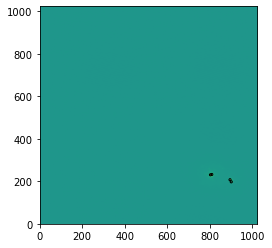

    xcentroid         ycentroid           roundness1     
----------------- ------------------ --------------------
901.6490030213554 197.16399237874074 -0.26538319971104285
 895.857790650832  207.0570181342619 -0.24119758067559377
803.8028626413001 230.36565638082828  -0.2247000223186905
810.0120120463787  231.7885334556765  -0.7793271404310104
input the 0 indexed integer of your target from the table above: 2
target star is at  803 , 230  at FWHM 5.427396843197812
input the size of reference psf stamp: 100


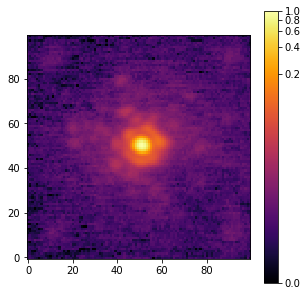

accept this epsf? (y/n): y
Select your target system to fit positions to


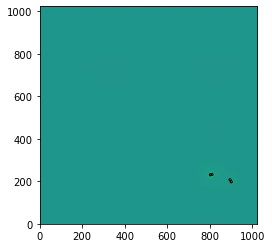

    xcentroid         ycentroid           roundness1     
----------------- ------------------ --------------------
901.6559556316801 197.11806973962155 -0.13214891318307023
895.8487113312485 207.05607299025831 -0.15102593601937597
803.7955723702261 230.39171551213553  -0.1375859626748891
810.6396959556381 231.84373544499635  -0.6377154763894822
input the 0 indexed integer of your target from the table above: 1
target star is at  895 , 207  at FWHM 5.3063612863331855


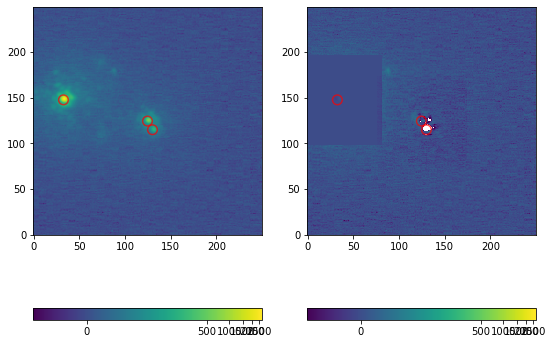

In [17]:
phot_results = starLocate(NIRC2_datasets[0][1], 100, 4, 5, stampsize=250, roundness=0.3, iterations=1, crit_sep=10, setfwhm=False)

In [18]:
phot_results

x_0,x_fit,y_0,y_fit,flux_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected,pixscale,date
float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,int32,float64,str10
131.55387916119813,130.0084449784346,115.36638592939688,114.79007592691883,10670.731847094283,300.4041009478501,1,1,5.160329706587072,0.058321718244967236,0.053232823593517824,1,0.009952,2001-12-20
125.86358178968558,124.50741470355815,125.05306151324457,124.25229245141804,22829.106409577093,624.3494326153806,2,2,1.4354282371729965,0.007841885519724298,0.007127692411433085,1,0.009952,2001-12-20
33.809916083179274,32.49496848057499,148.373523033747,147.49993689754962,92144.33881452549,2674.414432905108,3,3,0.7826367299586925,0.0009970606111403713,0.0005334809993677057,1,0.009952,2001-12-20


In [19]:
calcBinDist(phot_results)

108.92548136656933 mas +/- 0.6803774623093154 mas
944.4832456198347 mas +/- 0.09458864365213353 mas


array([[0.10892548, 0.94448325],
       [0.68037746, 0.09458864]])